In [2]:
import os
import pandas as pd

from tqdm import tqdm

#セットアップ
tqdm.pandas()

import sys
sys.path.append("/kaggle/src")
from kaggle_metrics.kaggle_kl_div import compute_each_score

In [3]:
oof_path = "/kaggle/working/exp000_notrepeat_inputs/tf_efficientnet_b0_ns_oof_df_exp000_notrepeat_inputs_stage1.csv"

In [4]:
oof_df = pd.read_csv(oof_path)

In [5]:
oof_df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,...,other_vote,total_evaluators,target,fold,pred_seizure_vote,pred_lpd_vote,pred_gpd_vote,pred_lrda_vote,pred_grda_vote,pred_other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,1.0,...,0.000000,3,Seizure,0,0.711850,0.059821,0.031907,0.030819,0.019863,0.145740
1,8071080,0,0.0,2593634,0,0.0,92643023,2944,GRDA,0.0,...,0.000000,3,GRDA,0,0.008218,0.037198,0.074058,0.054805,0.541758,0.283964
2,175641702,0,0.0,3250170,0,0.0,2564153803,33127,LRDA,0.0,...,0.000000,3,LRDA,0,0.258192,0.184464,0.087159,0.113383,0.082747,0.274054
3,893864755,0,0.0,4367732,0,0.0,1554550678,2338,Other,0.0,...,0.769231,13,Other,0,0.028503,0.032555,0.044432,0.127075,0.377061,0.390374
4,2184415503,0,0.0,4651057,0,0.0,164296540,47284,Other,0.0,...,1.000000,1,Other,0,0.030377,0.082431,0.343688,0.005772,0.008369,0.529363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20178,918950919,0,0.0,2145646585,0,0.0,3266555556,22147,Other,0.0,...,1.000000,3,Other,4,0.057157,0.013913,0.006017,0.049497,0.120818,0.752598
20179,897183978,0,0.0,2145731520,0,0.0,1724767128,25579,Other,0.0,...,0.666667,3,Other,4,0.106545,0.088707,0.011961,0.169083,0.066964,0.556740
20180,2982417621,0,0.0,2145983945,0,0.0,3989519932,7118,LRDA,0.0,...,0.266667,15,LRDA,4,0.081017,0.028448,0.009771,0.117948,0.395312,0.367504
20181,1306668185,0,0.0,2147312808,0,0.0,1216355904,57480,LPD,0.0,...,0.000000,3,LPD,4,0.101816,0.119881,0.020351,0.162056,0.141520,0.454377


In [6]:
# oof_df["valid_score"] = oof_df.progress_apply(compute_each_score, axis=1)

In [7]:
oof_path = "/kaggle/working/exp000_notrepeat_inputs/oof_with_valid_score.csv"
# oof_df.to_csv(oof_path, index=False)
oof_df = pd.read_csv(oof_path)

In [8]:
oof_df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote', 'total_evaluators',
       'target', 'fold', 'pred_seizure_vote', 'pred_lpd_vote', 'pred_gpd_vote',
       'pred_lrda_vote', 'pred_grda_vote', 'pred_other_vote', 'valid_score'],
      dtype='object')

In [9]:
oof_df["valid_score"].mean()

0.6605420471527773

In [10]:
for fold in range(5):
    print(f" === fold {fold} ===")
    fold_oof_df = oof_df[oof_df["fold"] == fold]
    fold_score = fold_oof_df["valid_score"].mean()
    print(f"fold{fold} score: {fold_score}")
    display(fold_oof_df["expert_consensus"].value_counts())

 === fold 0 ===
fold0 score: 0.6598619670179202


expert_consensus
Other      1462
Seizure     789
LPD         744
GRDA        427
LRDA        343
GPD         272
Name: count, dtype: int64

 === fold 1 ===
fold1 score: 0.6535199070182584


expert_consensus
Other      1555
Seizure     951
LPD         658
GRDA        357
GPD         277
LRDA        239
Name: count, dtype: int64

 === fold 2 ===
fold2 score: 0.6300183074524038


expert_consensus
Other      1561
Seizure     915
LPD         654
GPD         385
GRDA        340
LRDA        182
Name: count, dtype: int64

 === fold 3 ===
fold3 score: 0.7112945256947493


expert_consensus
Other      1474
Seizure     693
LPD         671
GPD         542
GRDA        419
LRDA        237
Name: count, dtype: int64

 === fold 4 ===
fold4 score: 0.6480249998293086


expert_consensus
Other      1665
Seizure     625
LPD         623
GPD         605
GRDA        387
LRDA        131
Name: count, dtype: int64

In [11]:
for fold in range(5):
    print(f" === fold {fold} ===")
    fold_oof_df = oof_df[oof_df["fold"] == fold]
    display(fold_oof_df.groupby("expert_consensus")["valid_score"].mean())

 === fold 0 ===


expert_consensus
GPD        0.654201
GRDA       0.806606
LPD        0.597986
LRDA       1.535939
Other      0.441256
Seizure    0.664961
Name: valid_score, dtype: float64

 === fold 1 ===


expert_consensus
GPD        0.656758
GRDA       0.881951
LPD        0.712362
LRDA       1.209079
Other      0.454389
Seizure    0.712095
Name: valid_score, dtype: float64

 === fold 2 ===


expert_consensus
GPD        0.578073
GRDA       0.841912
LPD        0.785732
LRDA       1.216351
Other      0.430927
Seizure    0.684867
Name: valid_score, dtype: float64

 === fold 3 ===


expert_consensus
GPD        0.787737
GRDA       1.175029
LPD        0.794439
LRDA       1.515199
Other      0.390549
Seizure    0.697912
Name: valid_score, dtype: float64

 === fold 4 ===


expert_consensus
GPD        0.506019
GRDA       1.349447
LPD        0.797707
LRDA       1.509279
Other      0.432603
Seizure    0.595327
Name: valid_score, dtype: float64

In [12]:
len(oof_df["patient_id"].unique()), len(oof_df)

(1950, 20183)

In [13]:
for i, id_ in enumerate(oof_df["patient_id"].unique()):
    patient_df = oof_df[oof_df["patient_id"] == id_]
    display(patient_df.groupby("expert_consensus")["valid_score"].mean())
    if i > 5:
        break

expert_consensus
Seizure    0.325214
Name: valid_score, dtype: float64

expert_consensus
GRDA    0.848149
Name: valid_score, dtype: float64

expert_consensus
LRDA       2.384081
Seizure    0.187373
Name: valid_score, dtype: float64

expert_consensus
GPD      0.611162
GRDA     0.482650
LPD      0.725586
Other    0.443185
Name: valid_score, dtype: float64

expert_consensus
Other    0.421343
Name: valid_score, dtype: float64

expert_consensus
Other    0.2184
Name: valid_score, dtype: float64

expert_consensus
GRDA     0.284345
Other    0.332955
Name: valid_score, dtype: float64

In [14]:
vote_cols = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
for i, id_ in enumerate(oof_df["patient_id"].unique()):
    print("patient id:", id_)
    patient_df = oof_df[oof_df["patient_id"] == id_]
    display(patient_df[vote_cols])
    if i > 5:
        break

patient id: 42516


,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1.0,0.0,0.0,0.0,0.0,0.0
504,1.0,0.0,0.0,0.0,0.0,0.0
2388,1.0,0.0,0.0,0.0,0.0,0.0
4013,1.0,0.0,0.0,0.0,0.0,0.0


patient id: 2944


,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
1,0.0,0.0,0.0,0.0,1.0,0.0
2192,0.0,0.0,0.0,0.0,1.0,0.0
2912,0.0,0.0,0.0,0.0,1.0,0.0


patient id: 33127


,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
2,0.0,0.0,0.0,1.0,0.0,0.0
2799,1.0,0.0,0.0,0.0,0.0,0.0
2857,0.0,0.0,0.0,1.0,0.0,0.0
2858,0.0,0.0,0.0,1.0,0.0,0.0


patient id: 2338


,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
3,0.000000,0.000000,0.000000,0.000000,0.230769,0.769231
61,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
175,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667
503,0.000000,0.000000,0.055556,0.000000,0.000000,0.944444
564,0.000000,0.066667,0.000000,0.200000,0.066667,0.666667
565,0.000000,0.066667,0.000000,0.200000,0.066667,0.666667
685,0.000000,0.000000,0.076923,0.153846,0.538462,0.230769
686,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
713,0.000000,0.000000,0.733333,0.000000,0.066667,0.200000
714,0.071429,0.000000,0.071429,0.000000,0.428571,0.428571


patient id: 47284


,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
4,0.0,0.0,0.0,0.0,0.00,1.00
52,0.0,0.0,0.0,0.0,0.00,1.00
58,0.0,0.0,0.0,0.0,0.00,1.00
306,0.0,0.0,0.0,0.0,0.00,1.00
307,0.0,0.0,0.0,0.0,0.00,1.00
...,...,...,...,...,...,...
3570,0.0,0.0,0.1,0.0,0.05,0.85
3632,0.0,0.0,0.0,0.0,0.00,1.00
3633,0.0,0.0,0.0,0.0,0.00,1.00
3974,0.0,0.0,0.0,0.0,0.00,1.00


patient id: 38697


,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
5,0.0,0.0,0.0,0.0,0.333333,0.666667
70,0.0,0.0,0.0,0.0,0.000000,1.000000
92,0.0,0.0,0.0,0.0,0.333333,0.666667
922,0.0,0.0,0.0,0.0,0.333333,0.666667
996,0.0,0.0,0.0,0.0,0.000000,1.000000
1214,0.0,0.0,0.0,0.0,0.000000,1.000000
1281,0.0,0.0,0.0,0.0,0.000000,1.000000
1332,0.0,0.0,0.0,0.0,0.333333,0.666667
1333,0.0,0.0,0.0,0.0,0.333333,0.666667
1334,0.0,0.0,0.0,0.0,0.333333,0.666667


patient id: 48861


,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
6,0.0,0.0,0.0,0.000000,0.230769,0.769231
7,0.0,0.0,0.0,0.000000,0.000000,1.000000
155,0.0,0.0,0.0,0.000000,0.384615,0.615385
156,0.0,0.0,0.0,0.000000,0.250000,0.750000
446,0.0,0.0,0.0,0.000000,0.000000,1.000000
447,0.0,0.0,0.0,0.000000,0.000000,1.000000
584,0.0,0.0,0.0,0.000000,0.000000,1.000000
608,0.0,0.0,0.0,0.000000,0.200000,0.800000
1675,0.0,0.0,0.0,0.000000,0.000000,1.000000
1676,0.0,0.0,0.0,0.000000,0.000000,1.000000


In [15]:
for eval_num in sorted(oof_df["total_evaluators"].unique()):
    print(f" === num {eval_num} ===")
    oof_ = oof_df[oof_df["total_evaluators"] == eval_num]
    fold_score = oof_["valid_score"].mean()
    print(f"fold{fold} score: {fold_score}")

 === num 1 ===
fold4 score: 0.6996728001933487
 === num 2 ===
fold4 score: 0.7139814120451927
 === num 3 ===
fold4 score: 0.8523693516384889
 === num 4 ===
fold4 score: 0.6437986227862887
 === num 5 ===
fold4 score: 0.466302772817102
 === num 6 ===
fold4 score: 0.5091339132395994
 === num 7 ===
fold4 score: 0.1807682038715304
 === num 10 ===
fold4 score: 0.7207258671952941
 === num 11 ===
fold4 score: 0.598646804664554
 === num 12 ===
fold4 score: 0.48573239808529456
 === num 13 ===
fold4 score: 0.44508628057316474
 === num 14 ===
fold4 score: 0.45617828705134766
 === num 15 ===
fold4 score: 0.46172282348941657
 === num 16 ===
fold4 score: 0.5446999109763635
 === num 17 ===
fold4 score: 0.3896031519299455
 === num 18 ===
fold4 score: 0.41341114168651477
 === num 19 ===
fold4 score: 0.4519459093344377
 === num 20 ===
fold4 score: 0.4160467817605826
 === num 21 ===
fold4 score: 0.37985921134906653
 === num 22 ===
fold4 score: 0.2558841768124336
 === num 23 ===
fold4 score: 0.239011431915

In [16]:
oof_df["vote_num"] = oof_df[vote_cols].sum(axis=1)
oof_df["is_reliable"] = (oof_df[vote_cols].max(axis=1) == oof_df["vote_num"]).astype(int)

In [17]:
sorted(oof_df["total_evaluators"].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [18]:
oof_df["total_evaluators"].value_counts()

total_evaluators
3     6264
1     3452
2     2078
15    1445
13    1358
5     1145
4      752
12     727
16     685
14     643
11     382
18     308
17     304
20     213
6      141
10     117
19      73
21      49
22      24
23      10
25       5
24       3
26       2
27       1
7        1
28       1
Name: count, dtype: int64

In [19]:
len(oof_df[oof_df["total_evaluators"] == 10]["patient_id"].unique()), len(oof_df[oof_df["total_evaluators"] == 10])

(103, 117)

In [20]:
oof_df[oof_df["total_evaluators"] == 10]["expert_consensus"].value_counts()

expert_consensus
Other      35
LPD        30
GRDA       19
LRDA       18
GPD         9
Seizure     6
Name: count, dtype: int64

In [21]:
oof_df["expert_consensus"].value_counts()

expert_consensus
Other      7717
Seizure    3973
LPD        3350
GPD        2081
GRDA       1930
LRDA       1132
Name: count, dtype: int64

 === num 1 ===
reliable score 0.6996728001933487
not reliable score nan
 === num 2 ===
reliable score 0.6984957961285403
not reliable score 0.7578668475580672
 === num 3 ===
reliable score 0.8729989786942648
not reliable score 0.7946814127079731
 === num 4 ===
reliable score 0.7235382439644916
not reliable score 0.6229271783168261
 === num 5 ===
reliable score 0.38764536957147555
not reliable score 0.49057420010432384
 === num 6 ===
reliable score 0.7804869226037796
not reliable score 0.46164713660086804
 === num 7 ===
reliable score 0.1807682038715304
not reliable score nan
 === num 10 ===
reliable score 1.4921538904805722
not reliable score 0.6862871161557729
 === num 11 ===
reliable score 0.5625090692840858
not reliable score 0.6017267252935711
 === num 12 ===
reliable score 0.5410599458055649
not reliable score 0.4798375299872445
 === num 13 ===
reliable score 0.37584996495504225
not reliable score 0.45254076153694295
 === num 14 ===
reliable score 0.46218911995418716
not reliable 

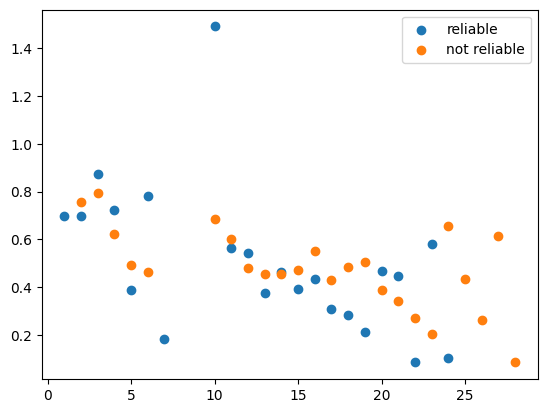

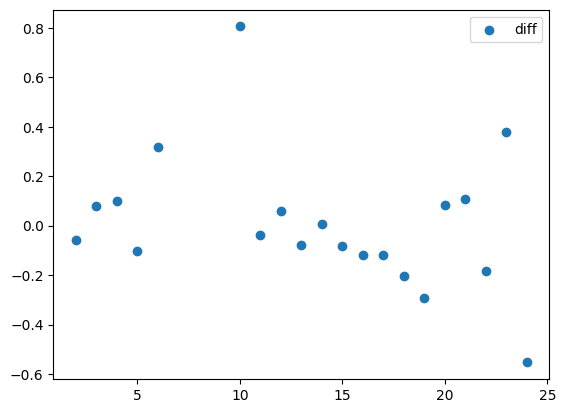

In [22]:
reliable_score_list = []
not_reliable_score_list = []
diff_list = []
for eval_num in sorted(oof_df["total_evaluators"].unique()):
    print(f" === num {eval_num} ===")
    oof_ = oof_df[oof_df["total_evaluators"] == eval_num]
    relialbe_oof_ = oof_[oof_["is_reliable"] == 1]
    reliable_score_ = relialbe_oof_["valid_score"].mean()
    print(f"reliable score {reliable_score_}")
    relialbe_oof_ = oof_[oof_["is_reliable"] ==0]
    not_reliable_score = relialbe_oof_["valid_score"].mean()
    print(f"not reliable score {not_reliable_score}")
    reliable_score_list.append(reliable_score_)
    not_reliable_score_list.append(not_reliable_score)
    diff = reliable_score_ - not_reliable_score
    diff_list.append(diff)


import matplotlib.pyplot as plt
plt.figure()
plt.scatter(sorted(oof_df["total_evaluators"].unique()), reliable_score_list, label="reliable")
plt.scatter(sorted(oof_df["total_evaluators"].unique()), not_reliable_score_list, label="not reliable")
plt.legend()
plt.show()

plt.figure()
plt.scatter(sorted(oof_df["total_evaluators"].unique()), diff_list, label="diff")
plt.legend()
plt.show()